<a href="https://colab.research.google.com/github/philxhuang/udacity-projects/blob/master/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks in MNIST Dataset

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torchvision
from torchvision import datasets, transforms

import helper

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# function for visualizing results
def view_classify(img, ps, version="MNIST"):
   ''' Function for viewing an image and it's predicted classes.
   '''
   ps = ps.data.numpy().squeeze()

   fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
   ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
   ax1.axis('off')
   ax2.barh(np.arange(10), ps)
   ax2.set_aspect(0.1)
   ax2.set_yticks(np.arange(10))
   if version == "MNIST":
       ax2.set_yticklabels(np.arange(10))
   elif version == "Fashion":
       ax2.set_yticklabels(['T-shirt/top',
                           'Trouser',
                           'Pullover',
                           'Dress',
                           'Coat',
                           'Sandal',
                           'Shirt',
                           'Sneaker',
                           'Bag',
                           'Ankle Boot'], size='small');
   ax2.set_title('Class Probability')
   ax2.set_xlim(0, 1.1)

   plt.tight_layout()

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:02, 3794658.36it/s]                             


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 67764.77it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1115449.17it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25230.14it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


The MNIST dataset comes with the PyTorch Library because it is widely used for model testing. Imported from torchvision, the "dataset" module allows us to use this alread downloaded dataset readily.

Dataloader allows us to load the data in batch sizes, of 64 in this case. The MNIST dataset (trainset) has a few hundred thousands data rows so training on small batches will be more efficient and increase accuracy over time.

In [0]:
# generate the same results
torch.manual_seed(10)

images, labels = next(iter(trainloader))
print(type(images), type(labels)) # tensor objects
print(images.shape) # with 64 images, each image has one channel, each channel has 28 rows and each row has 28 cols (28*28 pixels)
print(labels.shape) # a row of 64 labels in order

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


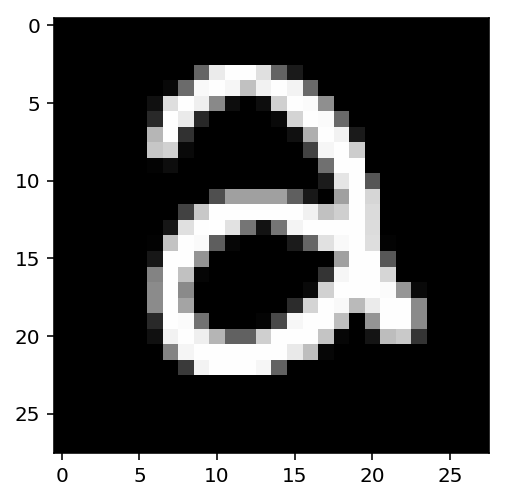

In [0]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r') # let's read the first image

Now we have our pre-cleaned data, we can start building our nn layers.

In [0]:
# This is the sigmoid activation function
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
print('The batch size is', images.shape[0])
inputs = images.view(images.shape[0], -1)

# Create parameters for two layers
w1 = torch.randn(784, 256) # 784 = 28*28 is the flatten image size in one row
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# pass through the first layer
h = activation(torch.mm(inputs, w1) + b1)
print(h.shape)

# pass through the second layer
out = torch.mm(h, w2) + b2
print(out.shape)
print('The prediction for the first image is', out[0])

The batch size is 64
torch.Size([64, 256])
torch.Size([64, 10])
The prediction for the first image is tensor([ -2.3307,   4.3930,   1.5372,  -4.9449,  -0.5049,  -4.9937,   5.1465,
        -12.4349,  -0.8891,  17.5090])


The output here is NOT the probability of each of the 10 images. Rather, it is the resulting weights of each of the 10 options from the nn, calculated through random weight matrices of the 2 layers.

In order to translate these nonsense numbers to probability, we use the softmax function. Note that there are many more such probability functions today, since softmax is relatively old.

In [0]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building the same NN with PyTorch OOP

Now that we know how to consruct the networks by layers internally, let's use the super power of PyTorch's Object-Orianted Programming Library to create NN simply.

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__() # you should definitely inherite the Object that comes with PyTorch
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [0]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

This is the hard and old way to construct model. Today torch comes with both OOP nn and F functions for you to play with. Make sure to import both every single time.

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

That was cleaner. However, today we don't even use sigmoid any more. Let's use ReLU.

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Now for this model, let's reinitialize the randomly generaly weights and biases in the 3 layers.

In [0]:
print(model.fc1.weight)
print(model.fc1.bias) # gradient is turne on by default

Parameter containing:
tensor([[ 0.0077,  0.0267,  0.0192,  ..., -0.0185, -0.0220,  0.0118],
        [ 0.0096,  0.0132, -0.0093,  ..., -0.0131,  0.0241,  0.0300],
        [ 0.0161,  0.0341, -0.0113,  ..., -0.0042, -0.0169,  0.0340],
        ...,
        [ 0.0056,  0.0157, -0.0299,  ..., -0.0257, -0.0049,  0.0174],
        [ 0.0234, -0.0221,  0.0267,  ...,  0.0239, -0.0289,  0.0134],
        [-0.0120, -0.0026,  0.0034,  ...,  0.0004,  0.0319,  0.0231]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0055,  0.0063,  0.0224, -0.0258,  0.0173, -0.0202, -0.0124,  0.0057,
         0.0340,  0.0350,  0.0194, -0.0248,  0.0053,  0.0178,  0.0067,  0.0339,
         0.0355,  0.0031, -0.0055,  0.0007,  0.0243,  0.0313, -0.0059,  0.0222,
        -0.0254, -0.0030, -0.0170,  0.0045, -0.0021,  0.0164,  0.0070,  0.0298,
         0.0240, -0.0151,  0.0267,  0.0038, -0.0311,  0.0190,  0.0299,  0.0274,
         0.0223,  0.0267, -0.0275,  0.0220, -0.0314, -0.0008, -0.0233,  0.0111,
        -0.0038

In [0]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0051, -0.0171,  0.0084,  ...,  0.0116, -0.0147,  0.0094],
        [ 0.0068, -0.0064, -0.0048,  ...,  0.0039,  0.0143, -0.0006],
        [ 0.0018,  0.0042,  0.0013,  ...,  0.0017, -0.0102,  0.0054],
        ...,
        [-0.0032, -0.0059,  0.0028,  ..., -0.0132,  0.0009,  0.0115],
        [ 0.0100,  0.0086, -0.0068,  ..., -0.0002, -0.0125,  0.0031],
        [-0.0004,  0.0032, -0.0026,  ...,  0.0030, -0.0010,  0.0074]])

Now we are ready for forward passes.

The probability of each image predicted for the first image tensor([[0.1125, 0.0973, 0.0885, 0.0920, 0.0975, 0.0990, 0.1017, 0.0995, 0.1105,
         0.1017]], grad_fn=<SoftmaxBackward>)


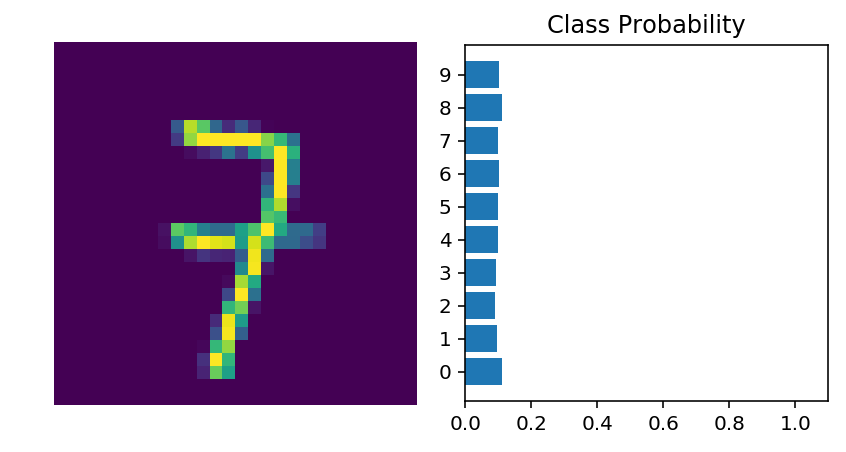

In [0]:
# Grab some data 
images, labels = next(iter(trainloader))

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])
print('The probability of each image predicted for the first image', ps)

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

## Sequential NN for MNIST

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


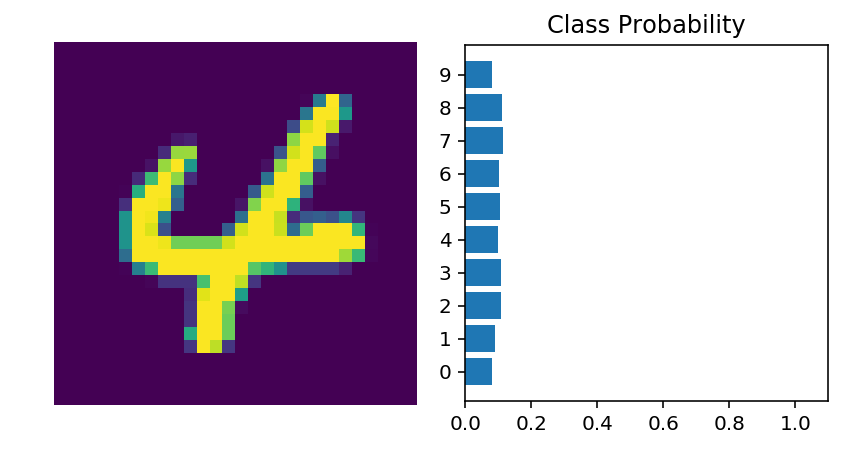

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [0]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0024, -0.0196, -0.0047,  ...,  0.0118, -0.0055, -0.0247],
        [ 0.0308,  0.0136,  0.0276,  ..., -0.0188,  0.0129,  0.0139],
        [ 0.0320,  0.0288,  0.0337,  ..., -0.0053,  0.0334, -0.0253],
        ...,
        [-0.0079,  0.0155,  0.0141,  ..., -0.0035,  0.0033, -0.0052],
        [-0.0168,  0.0286,  0.0188,  ...,  0.0253, -0.0230, -0.0013],
        [-0.0323,  0.0225, -0.0160,  ...,  0.0335,  0.0180, -0.0261]],
       requires_grad=True)

We could also access the individual functions this way:

In [0]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

NameError: ignored

In [0]:
print(model[0])
print(model.fc1)